# 2018111164 赵笑宽


# 1 数据预处理

a/1：
数据规范化可以将不同属性的取值放缩到同一个较小的，制定的区间，同时消除量纲，便于后续处理。因为判断用户体型相似，那么身高体重都需要考虑，而身高体重量纲不同，规范化便于后续处理。

a/2：
ID	身高 体重
1	0.6	0.2
2	0.4	0.2
3	0.6	0.4
4	0.5	0.1
身高是[1.4，1.9]平均分布，为(x-1.4)/(1.9-1.4)，体重是[40，90]平均分布，为(x-40)/(90-40)

a/3:  
计算欧式距离：
ID	与1欧式距离
1	0
2	0.2
3	0.2
4	0.141
所以4的体型和1更相似。计算欧式距离所得出。

b:  
等宽离散化： 区间宽度36.7 阈值是：46.7 和 83.3
年龄	性别	年收入
25	男	低收入
27	女	低收入
30	男	低收入
45	女	中收入
28	男	低收入
32	男	低收入
52	男	中收入
35	女	低收入
55	男	高收入
48	女	高收入


等深离散化： 每个区间3-4个样本
年龄	性别	年收入
25	男	低收入
27	女	低收入
30	男	中收入
45	女	高收入
28	男	中收入
32	男	低收入
52	男	中收入
35	女	中收入
55	男	高收入
48	女	高收入

要点开才能有格式的看


2:分类分析：

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('/Users/zhaoxiaokuan/Downloads/数据挖掘/Lec02/案例代码/titanic/train.csv')
test = pd.read_csv('/Users/zhaoxiaokuan/Downloads/数据挖掘/Lec02/案例代码/titanic/test.csv')
print('训练数据集: ', train.shape, '测试数据集: ', test.shape)

训练数据集:  (891, 12) 测试数据集:  (418, 11)


In [2]:
# 合并数据集
data = train.append(test, ignore_index = True)
print('合并后数据集: ', data.shape)

合并后数据集:  (1309, 12)


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


检测数据质量

In [7]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

画箱线图

In [8]:
import seaborn as sns
sns.boxplot( x = 'Survived', y = 'Age', data = data)

清洗数据，数据编码

In [9]:
Sex_map = {
    'female':0,
    'male':1
}
data['Sex'] = data['Sex'].map(Sex_map)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data = data.join(pd.get_dummies(data['Embarked'], prefix = 'Embarked'))
data = data.drop(['Embarked'], axis = 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [11]:
data = data.join(pd.get_dummies(data['Pclass'], prefix = 'Pclass'))
data = data.drop(['Pclass'], axis = 1)
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


特征工程

In [12]:
def get_title(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3

data['Title'] = data['Name'].map(get_title)
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,Mr
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,Mrs
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,Miss
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0,Mrs
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,Mr


In [13]:
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [14]:
Title_map = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Col': 'Officer',
    'Ms': 'Mrs',
    'Mlle': 'Miss',
    'Major': 'Officer',
    'Dona': 'Royalty',
    'Sir': 'Royalty',
    'Capt': 'Officer',
    'the Countess': 'Royalty',
    'Don': 'Royalty',
    'Lady': 'Royalty',
    'Mme': 'Mrs',
    'Jonkheer': 'Royalty'
}
data['Title'] = data['Title'].map(Title_map)
data['Title'].value_counts()
data = data.join(pd.get_dummies(data['Title'], prefix = 'Title'))
#去除文字变量
data = data.drop(['Title'], axis = 1)
data = data.drop(['Name'], axis = 1)
data = data.drop(['Ticket'], axis = 1)
data = data.drop(['Cabin'], axis = 1)

In [15]:
#补充缺失值  平均值和众数可能会导致结论偏误，近邻也许会好些
from sklearn.impute import KNNImputer
#select the numeric columns and transform it to numpy
n_train= train[['Age']].to_numpy() 
imputer = KNNImputer(n_neighbors=2, weights="uniform")
print('处理前缺失值个数:', np.isnan(n_train).sum())
n_train_impute = imputer.fit_transform(n_train)
print('处理后缺失值个数:', np.isnan(n_train_impute).sum())
print('处理后各均值：', np.mean(n_train_impute,axis=0))


处理前缺失值个数: 177
处理后缺失值个数: 0
处理后各均值： [29.69911765]


In [16]:
# 其中生还没有数据的直接丢掉，另外Cabin和Embarked前面已经丢掉了
data = data.dropna(axis = 0)
data.shape

(714, 19)

In [17]:
data['Family'] = data['SibSp'] + data['Parch'] + 1
data['FamilySingle'] = data['Family'].map(lambda a:1 if a == 1 else 0)
data['FamilySmall'] = data['Family'].map(lambda a:1 if 2 <= a <= 4 else 0)
data['FamilyLarge'] = data['Family'].map(lambda a:1 if 5 <= a else 0)
data = data.drop(['Family'], axis = 1)
data.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySingle,FamilySmall,FamilyLarge
0,1,0.0,1,22.0,1,0,7.2500,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,2,1.0,0,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,1.0,0,26.0,0,0,7.9250,0,0,1,...,1,0,1,0,0,0,0,1,0,0
3,4,1.0,0,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,5,0.0,1,35.0,0,0,8.0500,0,0,1,...,1,0,0,1,0,0,0,1,0,0


数据标准化

In [18]:
#选取range不在[0,1]的变量
print(data.describe())
data_r = data[['Age','SibSp','Parch','Fare']]

       PassengerId    Survived         Sex         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    0.634454   29.699118    0.512605   
std     259.119524    0.491460    0.481921   14.526497    0.929783   
min       1.000000    0.000000    0.000000    0.420000    0.000000   
25%     222.250000    0.000000    0.000000   20.125000    0.000000   
50%     445.000000    0.000000    1.000000   28.000000    0.000000   
75%     677.750000    1.000000    1.000000   38.000000    1.000000   
max     891.000000    1.000000    1.000000   80.000000    5.000000   

            Parch        Fare  Embarked_C  Embarked_Q  Embarked_S  ...  \
count  714.000000  714.000000  714.000000  714.000000  714.000000  ...   
mean     0.431373   34.694514    0.182073    0.039216    0.775910  ...   
std      0.853289   52.918930    0.386175    0.194244    0.417274  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   

In [19]:
#正态标准化 因为age有异常值
from sklearn import preprocessing
z_scaler = preprocessing.StandardScaler().fit(data_r)
print('mean:', z_scaler.mean_)
print('std:', z_scaler.scale_)
print(z_scaler.transform(data_r))

mean: [29.69911765  0.51260504  0.43137255 34.69451401]
std: [14.51632115  0.92913212  0.85269161 52.88185844]
[[-0.53037664  0.52457013 -0.50589515 -0.51897787]
 [ 0.57183099  0.52457013 -0.50589515  0.69189675]
 [-0.25482473 -0.55170307 -0.50589515 -0.50621356]
 ...
 [-0.73704057 -0.55170307 -0.50589515 -0.08877362]
 [-0.25482473 -0.55170307 -0.50589515 -0.08877362]
 [ 0.15850313 -0.55170307 -0.50589515 -0.50952283]]


数据集划分

In [20]:
from sklearn.model_selection import train_test_split
# Splitting into train and test sets
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
# test_size = 0.2意为训练集占80%，测试集占20%，即将数据集按4:1的比例划分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 628)
print(len(x_train), len(x_test))

571 143


Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/Users/zhaoxiaokuan/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [23]:
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg.predict(x_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg.predict_proba(x_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
Precision: 0.860 Recall: 0.768
F1 score: 0.811
AUC score: 0.898


Naive Bayesian

In [24]:
from sklearn.naive_bayes import BernoulliNB
# Fitting a Naive Bayes model with default parameters
clf = BernoulliNB()
clf.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf.predict(x_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf.predict_proba(x_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
Precision: 0.750 Recall: 0.804
F1 score: 0.776
AUC score: 0.872


Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(x_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(x_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.623 Recall: 0.679
F1 score: 0.650
AUC score: 0.707


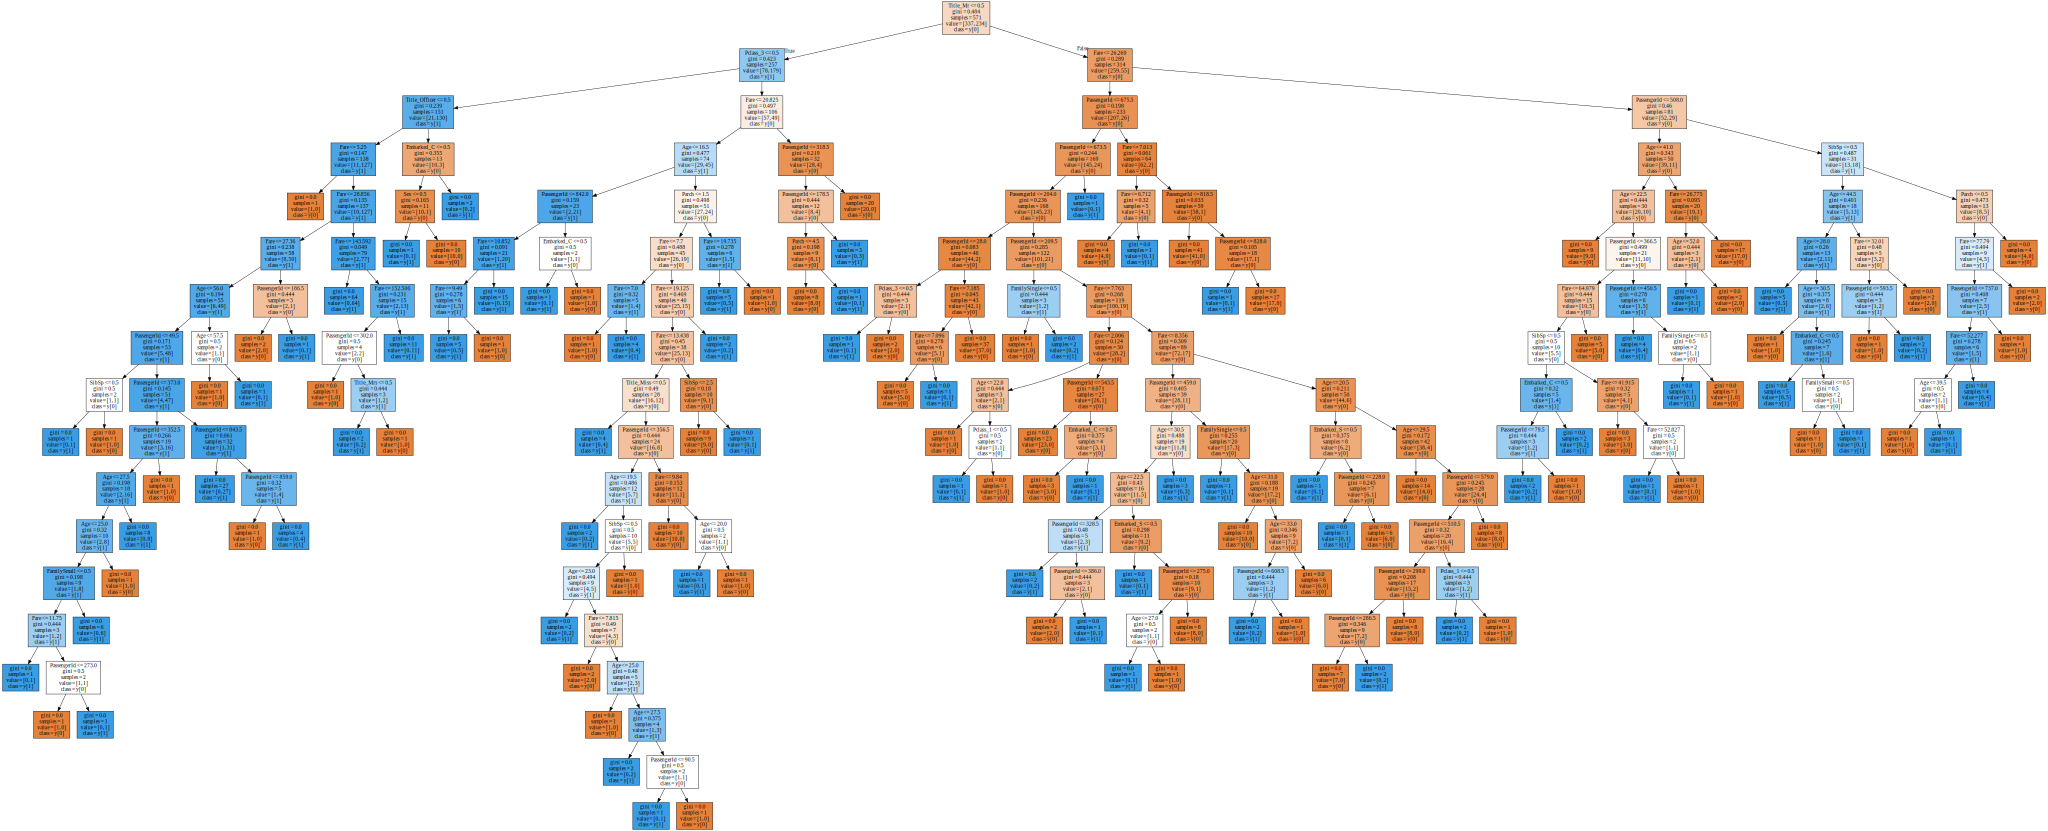

In [28]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, feature_names = x.columns, filled = True, class_names = True,out_file = None)  
graph = graphviz.Source(dot_data)
graph

为了防止过拟合，进行参数选取，这里画3，4，5

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(x_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(x_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.776 Recall: 0.804
F1 score: 0.789
AUC score: 0.901


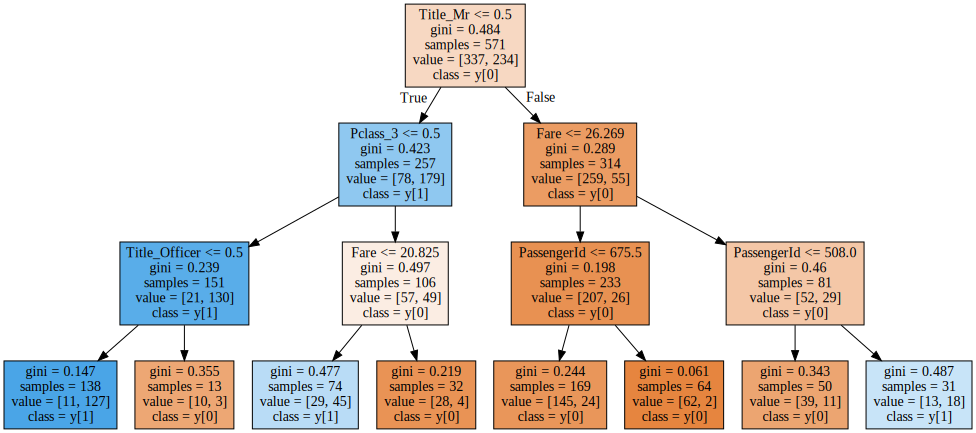

In [31]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, feature_names = x.columns, filled = True, class_names = True,out_file = None)  
graph = graphviz.Source(dot_data)
graph

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(x_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(x_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.889 Recall: 0.714
F1 score: 0.792
AUC score: 0.861


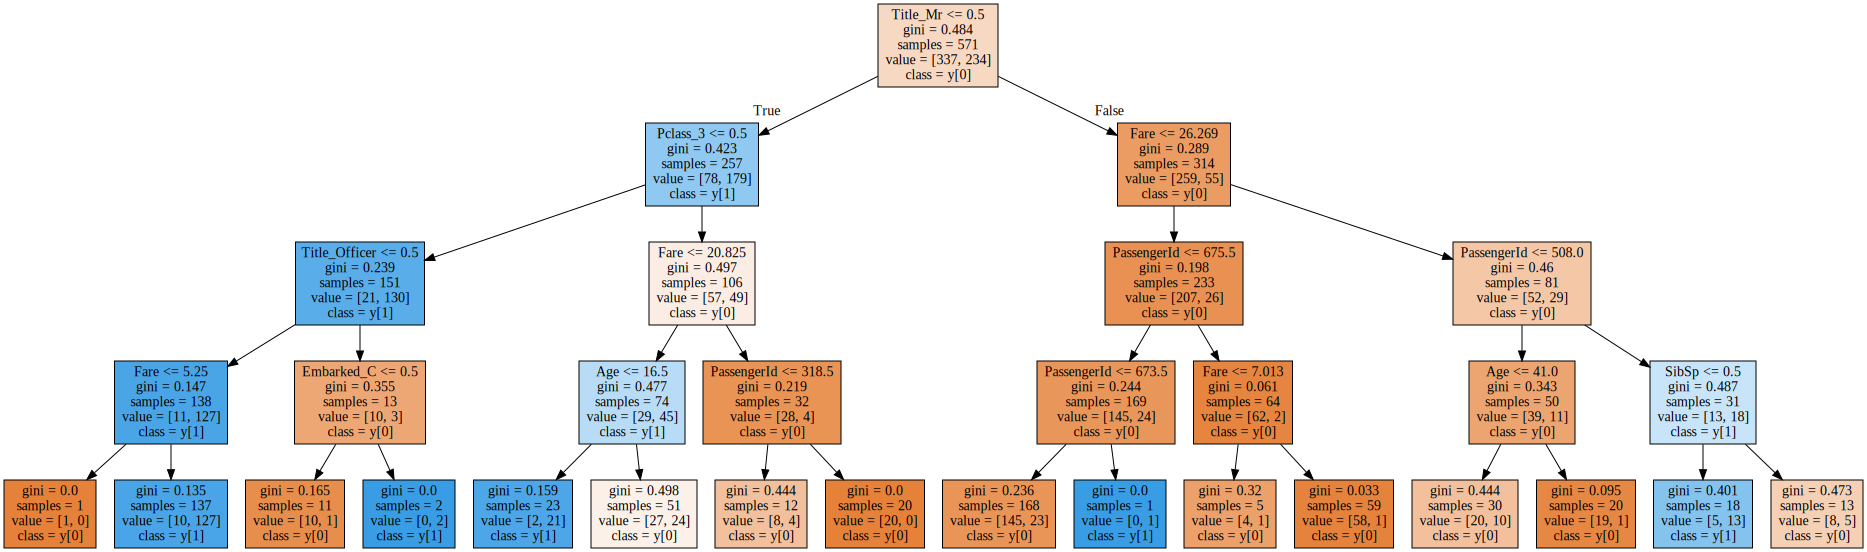

In [34]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, feature_names = x.columns, filled = True, class_names = True,out_file = None)  
graph = graphviz.Source(dot_data)
graph

In [35]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(x_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(x_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.848 Recall: 0.696
F1 score: 0.765
AUC score: 0.825


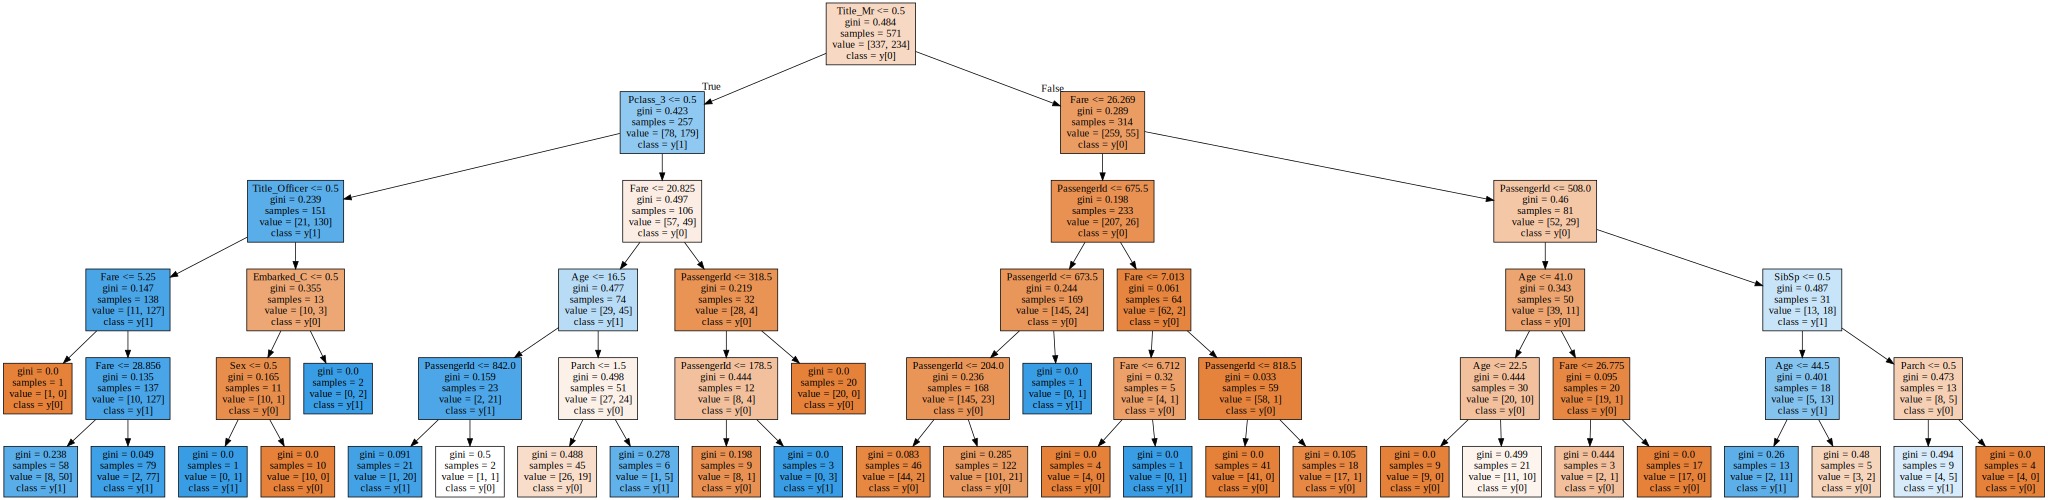

In [37]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, feature_names = x.columns, filled = True, class_names = True,out_file = None)  
graph = graphviz.Source(dot_data)
graph

找寻2-15中的最优错误率

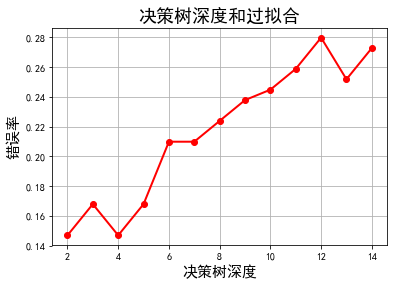

In [43]:
import matplotlib.pyplot as plt
depth = np.arange(2, 15)
err_list = []
for d in depth:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d)
    clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)
    result = (y_test_hat == y_test)
    # 生成一个长度为验证集数量的数组，每一个元素是yhat和y是否相等的结果，
    #生成错误率
    err = 1 - np.mean(result)
    err_list.append(err)
plt.figure(facecolor='w')
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel('决策树深度', fontsize=15)
plt.ylabel('错误率', fontsize=15)
plt.title('决策树深度和过拟合', fontsize=18)
plt.grid(True)
plt.show()

结果和上面比较，4最优。

比较三个模型的运行结果
逻辑回归：Precision: 0.860 Recall: 0.768 F1 score: 0.811 AUC score: 0.898
朴素贝叶斯：Precision: 0.750 Recall: 0.804 F1 score: 0.776 AUC score: 0.872
决策树（4层）：Precision: 0.889 Recall: 0.714 F1 score: 0.792 AUC score: 0.861
根据高阶数据比较（F1和AUC），我们选择最优分类器为逻辑回归。